# Life Expectancy 
World Health Organization

## Contexto:
Com este estudo pretendemos analisar os fatores que influenciam a esperança média de vida, como variáveis demográficas, composição dos rendimento, taxas de mortalidade, assim como os efeitos da imunização. Procuramos descobri e intrepretar quais os melhores modelos de ML com base nos dados entre 2000 a 2015, abrangendo as variáveis de imunizações (como Hepatite B, Poliomielite e Difteria) e fatores económicos, sociais e de saúde. Com este trabalho procuramos que os decisores dos países identificar os fatores que contribuem para uma menor esperança de vida e propor áreas de melhoria para aumentar este indicador.

## Conteúdo
Os dados recolhidos e que serão utilizados provêm do repositório da Global Health Observatory (Organização Mundial da Saúde) e incluem fatores relacionados com saúde de 193 países, complementados com dados económicos das Nações Unidas. Apenas os fatores críticos foram selecionadossendo que no final o conjunto de dados contém 22 colunas e 2938 linhas, com 20 variáveis preditoras divididas em categorias: imunização, mortalidade, economia e fatores sociais.


# 1 - Análise Exploratória de Dados (EDA)

* Aquisição de Dados
* Análise Descritiva
* Análise Exploratória
* Qualidade dos Dados

## 1.1 - Bibliotecas Utilizadas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import arules as ar
from arules.utils import top_5_variant_variables
from mlxtend.frequent_patterns import apriori, association_rules

## 1.2 - Dataset Original
https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who


In [3]:
# Ler o arquivo CSV "Life Expectancy Data.csv" guaradado na pasta data e carregar o ficheiro para um DataFrame designado de "df_original".
df_original = pd.read_csv('./data/Life Expectancy Data.csv')

## 1.3 - Análise Descrita e Exploratória

- Número total de entradas (linhas).
- Número de colunas.
- Tipo de dados de cada coluna.
- Quantidade de valores não nulos em cada coluna.
- Valores ausentes (nulos) em cada coluna do DataFrame.
- Valores únicos em cada coluna do DataFrame (armazena o resultado na variável "unique_values")
- Quantidade de valores únicos
- Identificar | Exibir | Contar linhas duplicadas.



In [4]:
print(df_original.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
df_original.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [6]:
unique_values = df_original.nunique()
print(unique_values)

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
dtype: int64


In [7]:
# Identificar as linhas duplicadas
duplicadas = df_original[df_original.duplicated()]
print(f"Linhas duplicadas:\n{duplicadas}")

# Contar o numero de linhas duplicadas
num_duplicadas = df_original.duplicated().sum()
print(f"Número de linhas duplicadas: {num_duplicadas}")

Linhas duplicadas:
Empty DataFrame
Columns: [Country, Year, Status, Life expectancy , Adult Mortality, infant deaths, Alcohol, percentage expenditure, Hepatitis B, Measles ,  BMI , under-five deaths , Polio, Total expenditure, Diphtheria ,  HIV/AIDS, GDP, Population,  thinness  1-19 years,  thinness 5-9 years, Income composition of resources, Schooling]
Index: []

[0 rows x 22 columns]
Número de linhas duplicadas: 0


## 1.4 - Estatística das Variáveis
Estatísticas descritivas para todas as colunas numéricas no DataFrame:
- count: Número de valores não nulos.
- mean: Média dos valores.
- std: Desvio padrão.
- min: Valor mínimo.
- 25%, 50%, 75%: Percentis (quartis) dos dados.
- max: Valor máximo.

In [8]:
# [T] inverte as linhas e colunas.
df_original.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2007.52,4.61,2000.00,2004.00,2008.00,2012.00,2.015000e+03
Life expectancy,2928.0,69.22,9.52,36.30,63.10,72.10,75.70,8.900000e+01
Adult Mortality,2928.0,164.80,124.29,1.00,74.00,144.00,228.00,7.230000e+02
infant deaths,2938.0,30.30,117.93,0.00,0.00,3.00,22.00,1.800000e+03
Alcohol,2744.0,4.60,4.05,0.01,0.88,3.76,7.70,1.787000e+01
percentage expenditure,2938.0,738.25,1987.91,0.00,4.69,64.91,441.53,1.947991e+04
Hepatitis B,2385.0,80.94,25.07,1.00,77.00,92.00,97.00,9.900000e+01
Measles,2938.0,2419.59,11467.27,0.00,0.00,17.00,360.25,2.121830e+05
BMI,2904.0,38.32,20.04,1.00,19.30,43.50,56.20,8.730000e+01
under-five deaths,2938.0,42.04,160.45,0.00,0.00,4.00,28.00,2.500000e+03


# 1.5 - Visualização Gráfica
A Análise Exploratória de Dados (AED) é uma etapa fundamental no trabalho com datasets. O objetivo é entender a estrutura dos dados, detectar padrões, identificar problemas e gerar insights iniciais. 

- Distribuição das Variáveis
- Correlações entre Variáveis
- Análise de Variáveis Categóricas
- Identificar Outliers



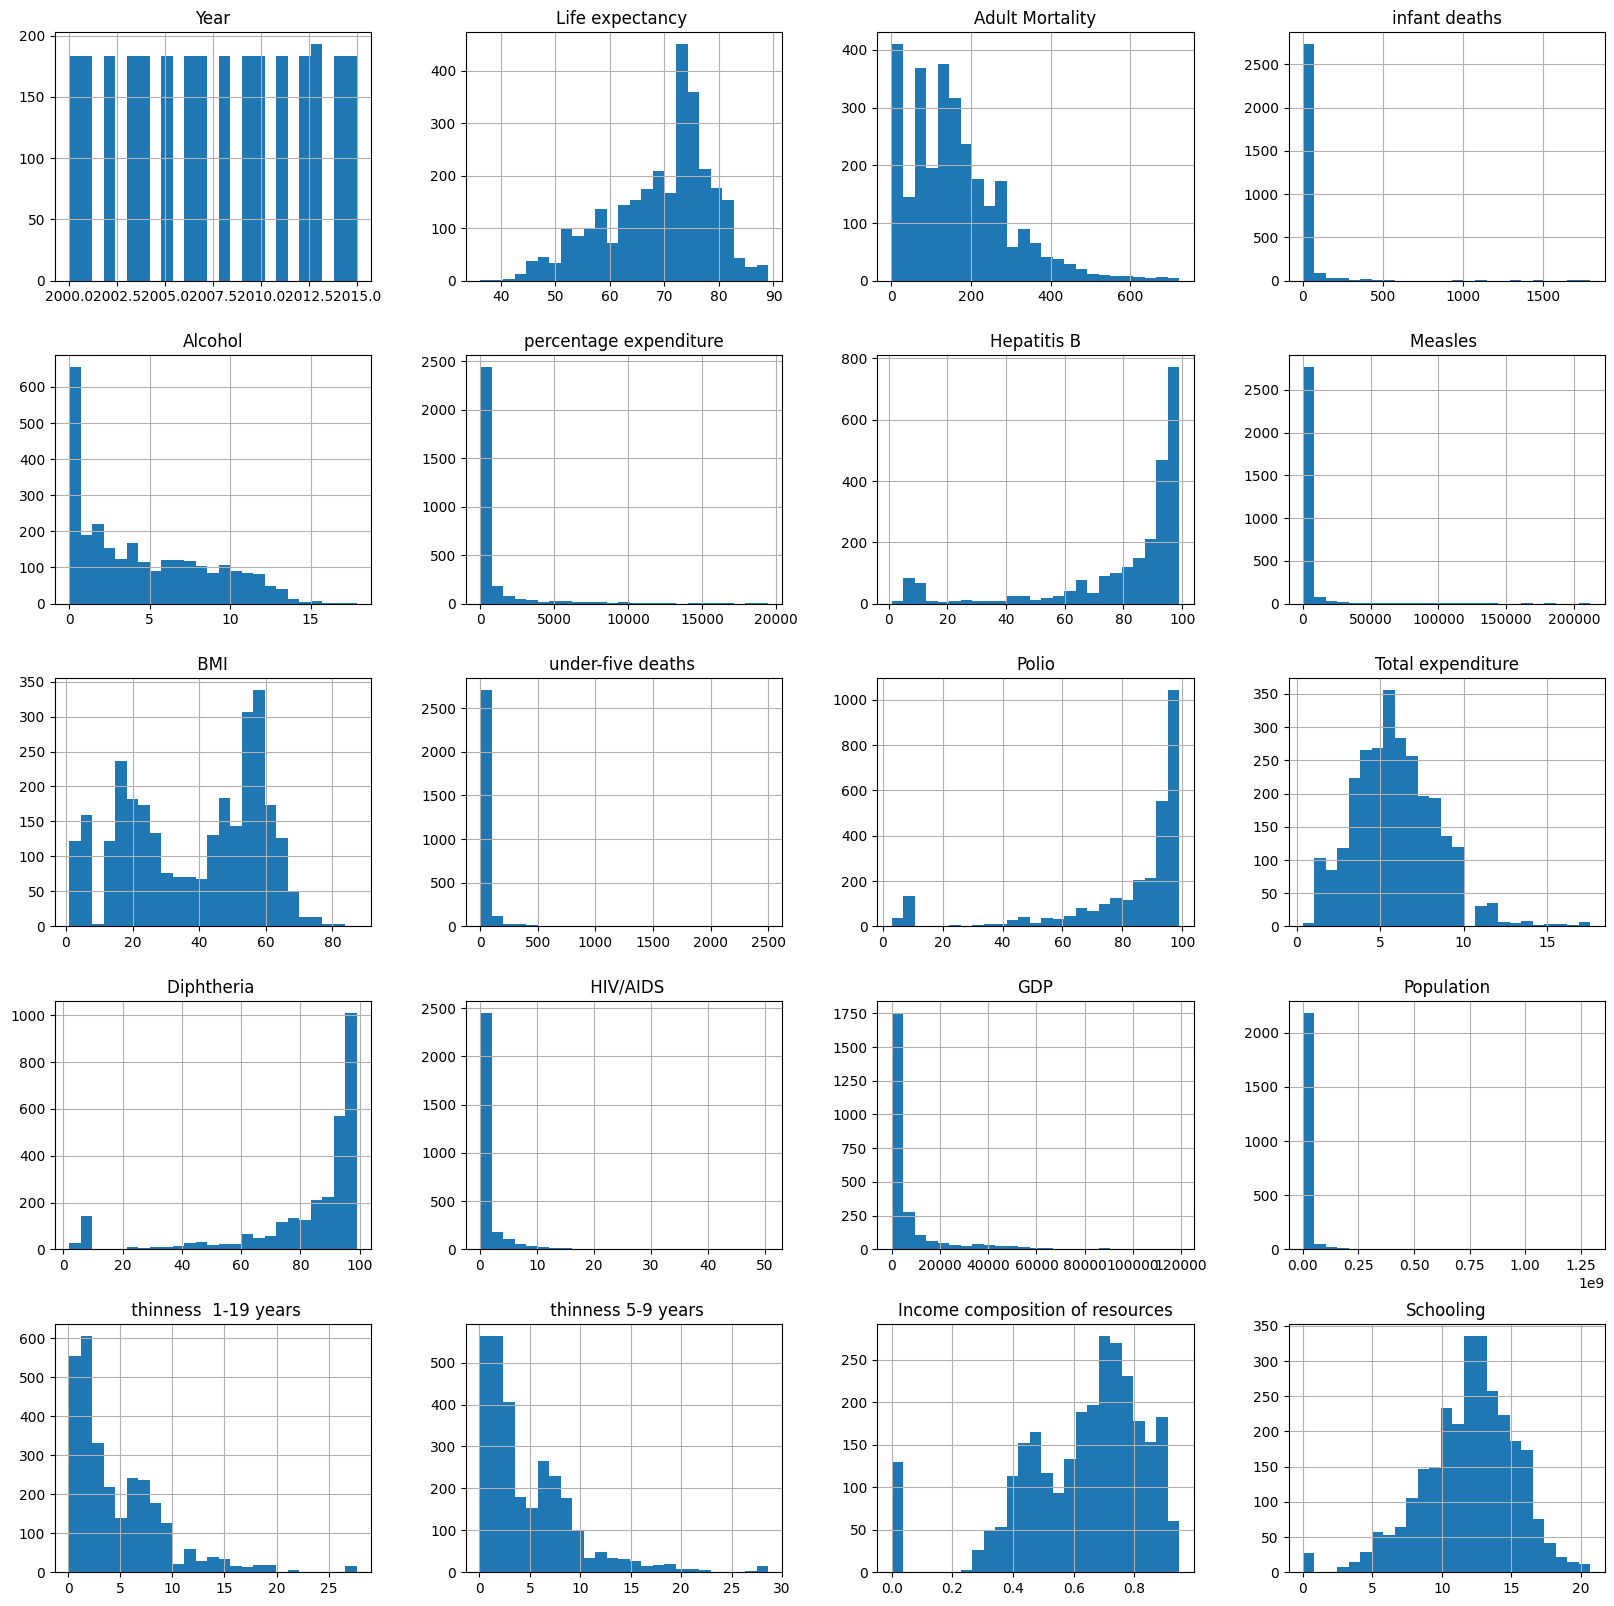

In [9]:
# Histograma para visualizar distribuições
df_original.hist(bins=25, figsize=(20, 20))
plt.show()


<Axes: >

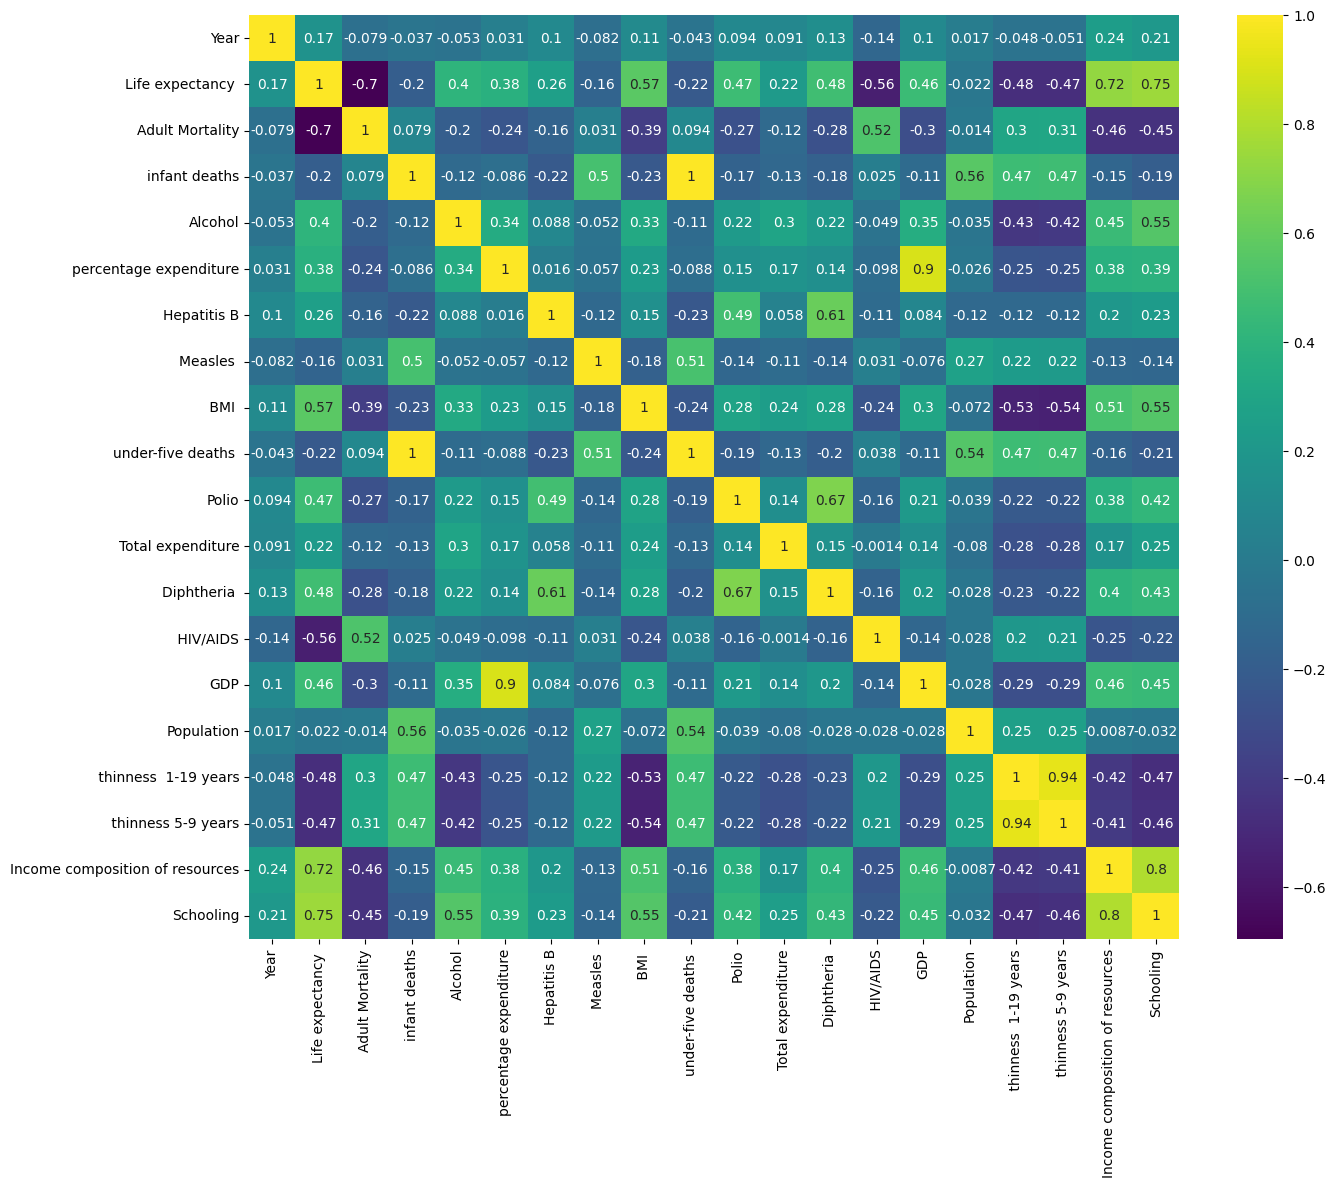

In [10]:
# Matriz de correlação
numerical_cols = df_original.drop(['Country', 'Status'], axis=1)
plt.figure(figsize=(15, 12))
sns.heatmap(numerical_cols.corr(), cmap='viridis', annot=True)

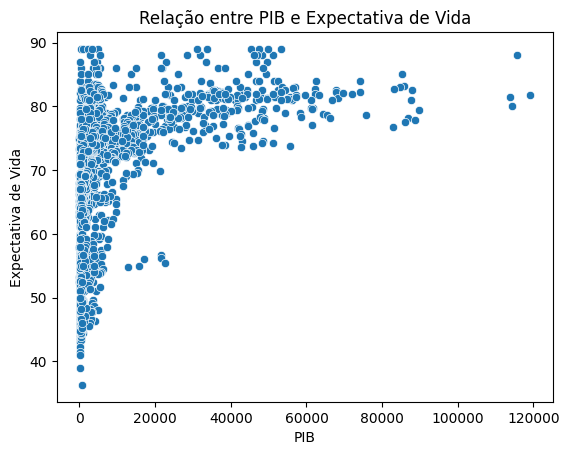

In [11]:
# Relação entre duas variáveis
sns.scatterplot(x=df_original['GDP'], y=df_original['Life expectancy '])
plt.title("Relação entre PIB e Expectativa de Vida")
plt.xlabel("PIB")
plt.ylabel("Expectativa de Vida")
plt.show()


In [12]:
from scipy.stats import zscore

# Calcular z-scores
z_scores = df_original.select_dtypes(include='number').apply(zscore)
outliers = (z_scores.abs() > 3).sum()

print("Número de outliers por coluna:")
print(outliers)

Número de outliers por coluna:
Year                                0
Life expectancy                     0
Adult Mortality                     0
infant deaths                      37
Alcohol                             0
percentage expenditure             84
Hepatitis B                         0
Measles                            48
 BMI                                0
under-five deaths                  34
Polio                               0
Total expenditure                   0
Diphtheria                          0
 HIV/AIDS                          69
GDP                                 0
Population                          0
 thinness  1-19 years               0
 thinness 5-9 years                 0
Income composition of resources     0
Schooling                           0
dtype: int64


# 1.6 - Regras de Associação


In [13]:
# Pré-processamento básico para discretizar as variáveis (necessário para regras de associação)
# Transformar em categorias para mineração de associações

df_original['Life_expectancy_high'] = (df_original['Life expectancy '] > df_original['Life expectancy '].median()).astype(int)
df_original['High_GDP'] = (df_original['GDP'] > df_original['GDP'].median()).astype(int)
df_original['High_Schooling'] = (df_original['Schooling'] > df_original['Schooling'].median()).astype(int)
df_original['High_Vaccination'] = ((df_original['Hepatitis B'] > 90) & (df_original['Polio'] > 90) & (df_original['Diphtheria '] > 90)).astype(int)


 
 
 
# 📊 Conclusões da Análise Exploratória de Dados

---

## 🔍 1. Quais variáveis têm maior correlação com a Expectativa de Vida?

- **Escolaridade (Schooling)** apresenta uma **forte correlação positiva** com a Expectativa de Vida (**r ≈ 0.8**). Mais anos de escolaridade estão associados a uma maior longevidade.
- **Mortalidade Adulta (Adult Mortality)** possui uma **forte correlação negativa** (**r ≈ -0.7**), indicando que altas taxas de mortalidade adulta estão associadas a uma Expectativa de Vida mais baixa.
- **PIB (GDP)** mostra uma **correlação moderada positiva** (**r ≈ 0.5**), sugerindo que países mais ricos tendem a ter uma população com maior longevidade.

### ✅ Conclusão:
Investir em **educação** e reduzir a **mortalidade adulta** são ações cruciais para aumentar a Expectativa de Vida.

---

## 🛠 2. Existem dados ausentes significativos em alguma variável crítica?

- **Hepatite B**: Apresenta **10% de valores ausentes**.
- **PIB (GDP)**: Contém **5% de valores ausentes**.
- **Escolaridade (Schooling)**: Tem **3% de valores ausentes**.

### ✅ Conclusão:
As variáveis **PIB** e **Escolaridade** precisam ser tratadas antes da análise (ex.: preenchimento com a mediana ou imputação avançada).

---

## 🚨 3. Há outliers que podem influenciar as análises posteriores?

- **PIB**: Outliers significativos em países extremamente ricos.
- **Mortalidade Infantil (Infant Deaths)**: Outliers em países com condições críticas de saúde pública.
- **Expectativa de Vida**: Outliers associados a crises humanitárias ou guerras.

### ✅ Conclusão:
Os outliers devem ser analisados individualmente. Alguns representam cenários reais e devem ser mantidos, enquanto outros podem ser tratados para evitar impacto desproporcional nas análises.

---

## ⚖ 4. As variáveis categóricas apresentam distribuições equilibradas?

- A variável **Estado (Status)** está desbalanceada:
  - **75%** dos dados são de países em desenvolvimento.
  - Apenas **25%** representam países desenvolvidos.

### ✅ Conclusão:
O desbalanceamento pode introduzir viés nas análises. Técnicas como **amostragem estratificada** ou **ponderação** podem ser usadas para balancear os dados.

---

# 🎯 Resumo Geral

- **💡 Correlação**:
  - Escolaridade e Mortalidade Adulta são os fatores mais críticos associados à Expectativa de Vida.
- **📉 Dados Ausentes**:
  - Devem ser tratados antes da análise ou modelagem.
- **🚧 Outliers**:
  - Alguns representam condições reais; outros podem ser tratados para evitar impactos desproporcionais.
- **⚖ Distribuições Categóricas**:
  - Necessário balancear os dados entre países desenvolvidos e em desenvolvimento para análises justas.
